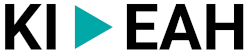

**Baustein:** Daten  **Subbaustein:** Wiederholung und Imbalanced Data   $\rightarrow$ **Übungsserie**

**Version:** 1.0, **Lizenz:** <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND 4.0</a>

***


# Einleitung

In dieser Übung werden Sie folgendes wiederholen:
- das lesen eines Pandas Data Frames
- Informationen über die Form und den Inhalt der Daten ansehen
- Datenvorberarbeitung (Skalierung, Entfernen von Zeilen mit ǸaN`-Werten , One-hot-encoding)
- Aufspalten eines Datensatzes in Trainings- und Testdaten
- Erstellen eines Klassifikations-Modells mit dem MLP Classifier (Neuronale Netze)
- Anzeigen der Confusion Matrix und Gütema0e

Sie werden hierbei zwei imbalanced Datensätze betrachten.

## Import Anweisungen

Notwendige `import`-Anweisungen für dieses Notebook

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            recall_score, f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler

# Teil 1: Wiederholung eines bekannten Beispiels: Der Breast Cancer Datensatz

In diesem Teil arbeiten wir mit dem [Wisconsin Breast Cancer Datensatz](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). Dieser basiert auf Merkmalen, die aus Bildern extrahiert wurden.

### Aufgabe 1: Daten laden

Verwenden Sie die Funktion `pd.read_csv()`, um den Datensatz `data/cancer.csv` und speichern Sie diesen in die Variable `daten`. 

In [ ]:
# Ihr Code

### Aufgabe 2: Daten ansehen

Verwenden Sie die Attribute `columns` und `shape` sowie die Methoden `head()`, `tail()` und `info()` und sehen Sie sich die Daten an.

In [ ]:
# Ihr Code

Beantworten Sie die folgenden Fragen:
- Wie viele Features hat der Datensatz?
- Wie viele einzelne Datenpunkte hat der Datensatz?
- Wie heisst die Klasse?
- Gibt es nicht definieret (`NaN`) Werte?
- Gibt es ein Attribut, das nicht für das Lernen genutzt werden darf?

Mit `info()` können wir die statistische Zusammenfassung der einzelnen numerischen Merkmale ansehen. Bei kategorischen (nominalen und ordinalen) Merkmalen ist häufig die Anzahl Werte pro Merkmalsausprägung relevent. Um diese für die Spalten des Type `object` und `category` auszugeben, können Sie wie folgt vorgehen:

``` python
# hier wird ein neuer Datenframe erstellt, der nur aus Merkmalen des Type object und category
# besteht
catData=daten.select_dtypes(include=['object','category'])

# hier werden die Werte ausgegeben
for c in catData.columns:
    print(catData[c].value_counts())
```

## Aufgabe 3: Verteilung der  Klassen

Im Cancer Datensatz hat das Klassenmerkmal zwei mögliche Werte. `B` steht für "benign" (gutartig) und `M` für "malign" (schlechtartig).

Verwenden Sie Code wie oben und zeigen Sie sich die Anzahl der gut- und bösartigen Datensätze an. Berechnen Sie die prozentuale Verteilung.

In [ ]:
# Ihr Code

## Aufgabe 4: Vorbereiten der Datensätze

Erzeugen Sie den Datensatz der Merkmale (`X`) sowie der Klassen (`y`) und teilen Sie dies mit dem Verhälnis 70% (Trainningsdaten) und 30% (Testdaten) auf.


Mit 

```python
X=daten.copy()
y=X.pop('diagnosis')
```
erzeugen Sie einen Datensatz `X` ohne die Klasse und einen Datensatz `y` der die Klasse enthält. 

Der folgende Code kann genutzt werden, um Daten in Trainings- und Testdaten aufzuteilen. 

```python
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=..., random_state=...,startify=y)
```

Durch Setzen des Parameters `random_state` stellen wir sicher, dass der Split für Tests mit anderen Modellen wiederholt werden kann. Mit `stratify=y` wird versucht, die Verteilung der Klassen sowohl bei den Trainigs- als auch bei den Testdaten der ursprünglichen Verteilung nachzubilden.

In [ ]:
# Ihr Code

## Aufgabe 5: Skalierung der Daten 

Mit den folgenden beiden Codezeilen 
``` python
scaler=StandardScaler()
X_trainScaled=scaler.fit_transform(X_train)
```

wird ein StandardScaler erzeugt und die Trainingsdaten werden mit diesem Scaler bearbeiten.

Erzeugen Sie mit Hilfe des obigen Codes den skalierten Trainingsdatensatz und speichern Sie sich den Skaler in einer Variable.

Warum ist es wichtig, sich diesen Scaler zu merken? Warum werden nur die Trainingsdaten und  nicht alle Daten skaliert?


In [ ]:
# Ihr Code

## Aufgabe 6: Trainieren des Modells

Mit dem folgenden Code wird das Modell trainiert und gespeichert:
``` python
# Model definieren inkl. Parameter
model=MLPClassifier(random_state=10)
# Trainieren
model.fit(X_trainScaled,y_train)
```
Sehen Sie in der API Dokumentation nach und verwenden Sie den Parameter `max_iter` um sicherzustellen, dass die Lernen konvergiert. 

In [ ]:
# Ihr Code

## Aufgabe 7: Testen des Modells

Mit dem folgenden Codesegment 
``` python
# Anwenden des Moduls zu Vorhersagen (hier Klassifikation)
X_testScaled=scaler.transform(X_test)
ypred=model.predict(X_testScaled)
# Evaluieren
print('Accuracy:',model.score(X_testScaled,y_test))
cm=confusion_matrix(y_test,ypred)
print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot()
```

wird das trainierte Model auf die Testdaten angewendet. Hierzu müssen die Testden mit dem zuvor trainierten Scalter skalier werden. Die Accuracy und die Confusion Matrix werden dann berechnet und die Confusion Matrix dargestellt.

Nutzen Sie obigen Code, um das Modell auf die Testdaten anzuwenden und das Ergebnis anzuzeigen.

In [ ]:
# Ihr Code

## Aufgabe 8: Gütemaße für imbalanced Data

In der Vorlesung haben Sie über Gütemaße gesprochen. Erläutern Sie kurz, warum Accuracy für imbalanced Data nicht das beste einzige Gütemaß sein sollte. 
Berechnen Sie, basierend auf obiger Confusion Matrix die folgenden Gütemaße
- Precision
- Spezifität
- Recall
- F1-Score.

**Ihre Antwort:**


## Aufgabe 9: Gütemaße mit sklearn brechnen

Auch in Python (`sklearn`) stehen Ihnen verschiedene Gütemaße zur Verfügung. die in folgender Form aufgerufen werden (hierbei steht xy für das Gütemaß):

`xy_score(y_true, y_pred)`

xy kann hier für `accuracy`, `f1`und `recall` stehen. Beim Aufruf von `recall_scor` muss zusätzlich noch das Label der positiven Klasse als weiterer Parameter übergeben werden: `pos_label='`

Wenn Sie hier das negative Label übergeben, erhalten Sie die Spezifizität.

Berechen Sie die Werte für:
- Precision
- Spezifität
- Recall
- F1-Score
mit Python und vergleichen Sie die Werte mit Ihren Ergebnissen aus **Aufgabe 8**,

In [ ]:
# Ihr Code


# Teil 2: WILT: Klassifikation kranker Bäume

Der [WILT Datensatz](https://archive.ics.uci.edu/dataset/285/wilt)  ist sehr unausgeglichen mit nur wenigen positiven Daten. In diesem Datensatz geht es um die Identifikation kranker Bäume. 

## Aufgabe 10: WILT Datensatz

Laden Sie die Trainingsdaten `data/Wilt_training.csv` in einen Dataframe. 
- Sehen Sie sich die Daten an.
- Wie lautet der Namen des Klassenattributs? Welche Werte gibt es? Wie ist die prozentuale Verteilung?
- Trainieren Sie den Scaler sowie das Model.
- Geben Sie die Accuracy aus, wenn Sie die Trainingsdaten vorhersagen. 
- Laden Sie dann die Testdaten `data/Wilt_testing.csv` in einen Datenframe, skalieren Sie sie und bestimmen Sie die Accuracy, wenn Sie das Model auf Testdaten anwenden.
- Geben Sie die weiteren Gütemaße Recall, Spezifität und F1 Score aus.
- Diskutieren Sie die Ergebnisse sowie die Verteilung der Klassen in den Trainings. und Testdaten. Wie finden Sie das Model?

In [ ]:
# Ihr Code

# Teil 3: Ein weiteres Beispiel: 

In diesem Beispiel geht es um die Vorhersage von Schlaganfällen [Cerebral Stroke Prediction-Imbalanced Dataset](https://www.kaggle.com/datasets/shashwatwork/cerebral-stroke-predictionimbalaced-dataset/data) 

## Aufgabe 11: Stroke Datensatz

Die Daten sind in der Datei `data/stroke.csv`. Gehen Sie ähnlich vor wie in Aufgabe 10. 
In diesem Beispiel müssen wir allerdings die Daten noch etwas vorverarbeiten:
- Löschen Sie das Merkmal / die Spalte `id`
- Rufen Sie die Methode `pd.get_dummies(daten)` auf, um die Daten mit one-hot-encoding zu codieren.
- In der Spalte `smoking_status` sind sehr viele Daten nicht spezifiziert `NaN`. Diese werden beim one-hot-encoding ignoriert. D.h. in diesen Zeile erhalten alle Spalten des one-hot-encoding den Wert `False`.
- Der `MLPClassifier` kann nicht existierende Werte (`NaN`) nicht verarbeiten. Löschen Sie diese mit Hilfe der Methode `daten.dropna()`. 

In [ ]:
# Ihr Code

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Die Übungsserie begleitend zum AI4ALL-Kurs</span> der <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">EAH Jena</span> ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Namensnennung - Nicht kommerziell - Keine Bearbeitungen 4.0 International Lizenz</a>.

Der AI4ALL-Kurs entsteht im Rahmen des Projekts MoVeKI2EAH. Das Projekt MoVeKI2EAH wird durch das BMBF (Bundesministerium für Bildung und Forschung) und den Freistaat Thüringen im Rahmen der Bund-Länder-Initiative zur Förderung von Künstlicher Intelligenz in der Hochschulbildung gefördert (12/2021 bis 11/2025, Föderkennzeichen 16DHBKI081).